# Optical Fibers

### **1.1 What Is an Optical Fiber?**

An **optical fiber** is a flexible, transparent fiber made of glass (silica) or plastic that transmits light between the two ends. It is a **waveguide** for light, operating on the principle of **total internal reflection (TIR)**.


### **1.2 Structure of an Optical Fiber**

**Three main layers:**

| Layer    | Material     | Function                                     |
| -------- | ------------ | -------------------------------------------- |
| Core     | Glass/Silica | Light-carrying region                        |
| Cladding | Glass/Silica | Keeps the light confined in the core via TIR |
| Coating  | Polymer      | Mechanical protection                        |

The **core** has a higher refractive index than the **cladding**, ensuring TIR.

### **1.3 Principle of Total Internal Reflection**

* $n_1$: Refractive index of core
* $n_2$: Refractive index of cladding, where $n_2 < n_1$

**Total internal reflection** occurs when light is incident at the core-cladding boundary at an angle $\theta$ such that:

$$
\theta > \theta_c = \sin^{-1}\left( \frac{n_2}{n_1} \right)
$$

This ensures the light is trapped inside the core.

### **1.4 Acceptance Angle and Numerical Aperture (NA)**

The **Acceptance Angle** $\theta_0$ is the maximum angle at which light can enter the fiber and still be guided.

The **Numerical Aperture** (NA) defines this and is given by:

$$
\text{NA} = \sqrt{n_1^2 - n_2^2}
$$

$$
\sin(\theta_0) = \text{NA}
$$


### **1.5 Types of Optical Fibers**

| Type                    | Core Diameter | Mode Count      | Used For                      |
| ----------------------- | ------------- | --------------- | ----------------------------- |
| Single Mode Fiber (SMF) | \~8–10 µm     | One             | Long-distance, high-bandwidth |
| Multi-Mode Fiber (MMF)  | 50–62.5 µm    | Multiple (100s) | Short-distance, LAN           |

**SMF** has low dispersion and supports higher data rates over longer distances.
**MMF** is cheaper but suffers from **modal dispersion**.


### **1.6 Key Equations**

* **Critical angle**:

  $$
  \theta_c = \sin^{-1}\left(\frac{n_2}{n_1}\right)
  $$

* **Numerical Aperture**:

  $$
  \text{NA} = \sqrt{n_1^2 - n_2^2}
  $$

* **V-Number** (determines number of modes):

  $$
  V = \frac{2\pi a}{\lambda} \cdot \text{NA}
  $$

  where:

  * $a$: Core radius
  * $\lambda$: Wavelength of light

  For **Single Mode Operation**, $V < 2.405$





---

### NA, acceptance angle, and V-number


Here are the computed results for your optical fiber parameters:

* **Numerical Aperture (NA)**: 0.2425
* **Acceptance Angle**: 14.03°
* **V-number**: 4.42
* **Single Mode?**: **No** (because $V > 2.405$)

This means the fiber supports **multiple modes** at a wavelength of 1550 nm with a 4.5 µm radius. To achieve single-mode behavior, either the core radius should be smaller, or the wavelength should be longer.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
wavelength = 1550e-9  # 1550 nm in meters, common telecom wavelength

# Example fiber parameters
n_core = 1.48       # Refractive index of core
n_cladding = 1.46   # Refractive index of cladding
core_radius = 4.5e-6  # 4.5 microns, typical for SMF

# Numerical Aperture (NA)
NA = np.sqrt(n_core**2 - n_cladding**2)

# Acceptance Angle in radians and degrees
theta_0_rad = np.arcsin(NA)
theta_0_deg = np.degrees(theta_0_rad)

# V-number
V = (2 * np.pi * core_radius / wavelength) * NA

# Print results
results = {
    "Numerical Aperture (NA)": NA,
    "Acceptance Angle (degrees)": theta_0_deg,
    "V-number": V,
    "Single Mode?": "Yes" if V < 2.405 else "No"
}

results


{'Numerical Aperture (NA)': np.float64(0.2424871130596432),
 'Acceptance Angle (degrees)': np.float64(14.033378410321736),
 'V-number': np.float64(4.423330062455067),
 'Single Mode?': 'No'}

### Ray tracing for multimode vs single-mode visualization

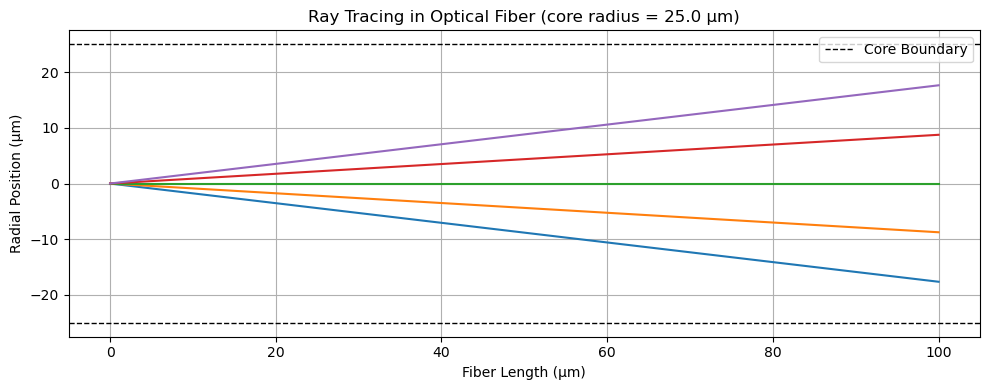

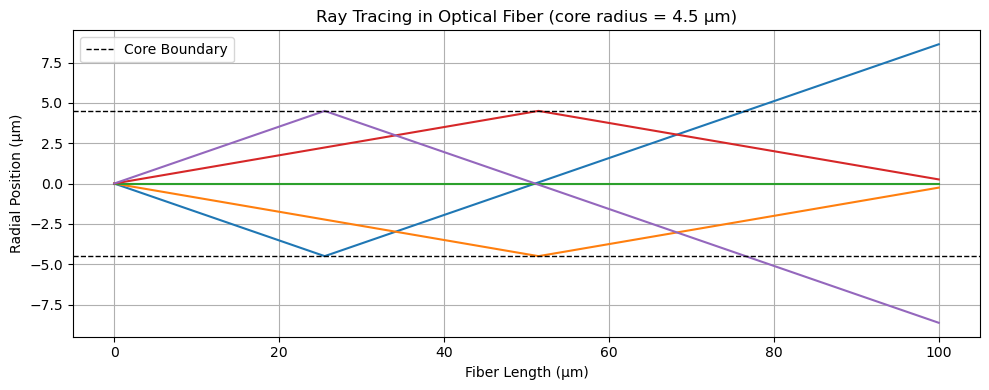

In [2]:

def ray_trace(core_radius, n_core, n_cladding, num_rays=5, angle_spread=10):
    """
    Simulates ray tracing inside an optical fiber.
    """
    fiber_length = 100e-6  # 100 microns
    z = np.linspace(0, fiber_length, 1000)
    
    # Central ray angle and spread (in degrees)
    base_angle = 0  # central axis
    angles = np.linspace(-angle_spread, angle_spread, num_rays)
    angles_rad = np.radians(angles)
    
    # Ray tracing plot
    plt.figure(figsize=(10, 4))
    
    for angle in angles_rad:
        x = np.tan(angle) * z
        # Reflect rays at the core-cladding boundary
        for i in range(len(x)):
            if abs(x[i]) >= core_radius:
                angle *= -1  # reflect
                x[i:] = np.tan(angle) * (z[i:] - z[i]) + x[i]
                break
        plt.plot(z * 1e6, x * 1e6)  # convert to microns for plotting

    plt.axhline(core_radius * 1e6, color='k', linestyle='--', linewidth=1, label='Core Boundary')
    plt.axhline(-core_radius * 1e6, color='k', linestyle='--', linewidth=1)
    plt.title(f"Ray Tracing in Optical Fiber (core radius = {core_radius*1e6:.1f} µm)")
    plt.xlabel("Fiber Length (µm)")
    plt.ylabel("Radial Position (µm)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Multimode fiber (core radius = 25 µm)
ray_trace(core_radius=25e-6, n_core=1.48, n_cladding=1.46)

# Example: Single-mode-like (core radius = 4.5 µm)
ray_trace(core_radius=4.5e-6, n_core=1.48, n_cladding=1.46)


The two plots above show **ray tracing simulations** for:

1. **Multimode Fiber (25 µm core radius)**:

   * Multiple rays enter at different angles and reflect within the core.
   * These reflections represent **multiple guided modes**.
   * Greater core radius and acceptance angle support many paths.

2. **Single-Mode-like Fiber (4.5 µm core radius)**:

   * Only very shallow-angle rays are guided.
   * Most rays would either not enter or leak out (not shown here).
   * The visualization suggests fewer or no reflections, aligning with **single-mode behavior**.

This ray model gives an intuitive view of how light behaves in multimode vs. single-mode fibers.




---

## **Dispersion and Attenuation in Optical Fibers**

**Dispersion** causes **pulse broadening** during transmission. As a result, optical pulses spread out and may overlap, leading to **inter-symbol interference (ISI)** and **bit errors**.

There are **two main types**:

| Type                 | Occurs In          | Caused By                                        |
| -------------------- | ------------------ | ------------------------------------------------ |
| Modal Dispersion     | Multimode fibers   | Different modes take different paths             |
| Chromatic Dispersion | Single-mode fibers | Different wavelengths travel at different speeds |


### **Modal Dispersion**

* **Only in Multimode fibers**.
* Rays enter at different angles (modes), traveling different distances.
* Higher-order modes take longer paths → arrive later.
* Results in **pulse spreading**.

**Modal Delay Spread** $\Delta t \approx \frac{n_1 L \Delta}{c}$

Where:

* $L$: fiber length
* $n_1$: core refractive index
* $\Delta = \frac{n_1 - n_2}{n_1}$: relative index difference
* $c$: speed of light

### **Chromatic Dispersion (Group Velocity Dispersion)**

Occurs because the **refractive index $n(\lambda)$** varies with wavelength.

Two parts:

1. **Material Dispersion**: caused by $n(\lambda)$ of silica
2. **Waveguide Dispersion**: caused by fiber geometry

Total **Dispersion Parameter**:

$$
D(\lambda) = \frac{d}{d\lambda} \left( \frac{1}{v_g} \right) 
= -\frac{\lambda}{c} \cdot \frac{d^2 n}{d\lambda^2} 
\quad \left[ \frac{\text{ps}}{\text{nm} \cdot \text{km}} \right]
$$


* $v_g$: group velocity
* Affects **single-mode fibers** at high bitrates (e.g., 10 Gbps+)
* Can be **positive or negative**, depending on wavelength

### **Dispersion Length**

A way to estimate how far a pulse can travel before significant spreading:

$$
L_D = \frac{T_0^2}{|\beta_2|}
$$

* $T_0$: input pulse width
* $\beta_2$: group velocity dispersion parameter


### **Attenuation**

**Attenuation** refers to signal power loss along the fiber, typically measured in **dB/km**.

The **Power at distance $z$** is:

$$
P(z) = P_0 e^{-\alpha z}
$$

or in decibels:

$$
\text{Loss (dB)} = 10 \log_{10} \left( \frac{P_0}{P(z)} \right) = \alpha_{dB} \cdot z
$$

Where:

* $\alpha$: attenuation coefficient (in $\text{km}^{-1}$)
* Typical $\alpha_{dB}$ at 1550 nm ≈ **0.2 dB/km** for modern SMF

**Sources of attenuation:**

* **Absorption** (by impurities like OH- ions)
* **Scattering** (Rayleigh scattering)
* **Bending losses**

---

| Concept              | Dominant In        | Effect                            |
| -------------------- | ------------------ | --------------------------------- |
| Modal Dispersion     | Multimode fibers   | Intermodal delay, pulse spreading |
| Chromatic Dispersion | Single-mode fibers | Wavelength-dependent delay        |
| Attenuation          | All fibers         | Signal loss, power degradation    |




Calculate attenuation over a given fiber length and plot the power decay?

Visualize modal dispersion using time-of-arrival in multimode fibers?